In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

uploaded = files.upload()
filename = list(uploaded.keys())[0]  # Extract the uploaded file name
df = pd.read_csv(io.BytesIO(uploaded[filename]))



# Display basic info and first few rows
print(df.info())
print(df.head())

Saving stars.csv to stars.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   method    1035 non-null   object 
 1   number    1035 non-null   int64  
 2   age       992 non-null    float64
 3   mass      513 non-null    float64
 4   distance  808 non-null    float64
 5   year      1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
None
            method  number      age   mass  distance  year
0  Radial Velocity       1  269.300   7.10     77.40  2006
1  Radial Velocity       1  874.774   2.21     56.95  2008
2  Radial Velocity       1  763.000   2.60     19.84  2011
3  Radial Velocity       1  326.030  19.40    110.62  2007
4  Radial Velocity       1  516.220  10.50    119.47  2009


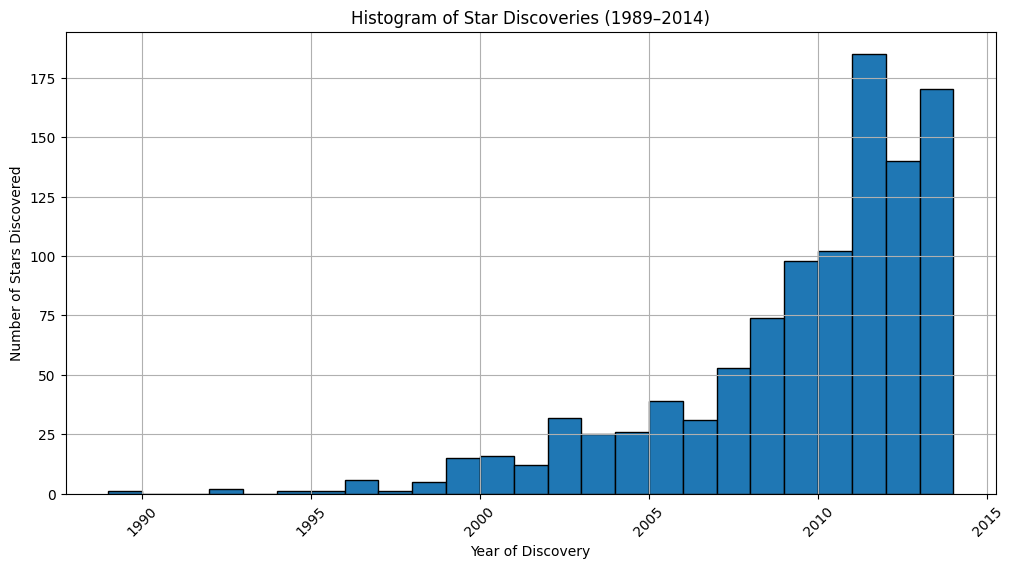

Yearly discoveries summary:
 year
1989      1
1992      2
1994      1
1995      1
1996      6
1997      1
1998      5
1999     15
2000     16
2001     12
2002     32
2003     25
2004     26
2005     39
2006     31
2007     53
2008     74
2009     98
2010    102
2011    185
2012    140
2013    118
2014     52
Name: count, dtype: int64
Year with most discoveries: 2011 with 185 discoveries


In [6]:
#A. Histogram: Discoveries over Years
plt.figure(figsize=(12,6))
df['year'].hist(bins=range(1989, 2015), edgecolor='black')
plt.title("Histogram of Star Discoveries (1989–2014)")
plt.xlabel("Year of Discovery")
plt.ylabel("Number of Stars Discovered")
plt.xticks(rotation=45)
plt.show()


# Yearly discoveries summary
discoveries_per_year = df['year'].value_counts().sort_index()
print("Yearly discoveries summary:\n", discoveries_per_year)
print("Year with most discoveries:", discoveries_per_year.idxmax(), "with", discoveries_per_year.max(), "discoveries")

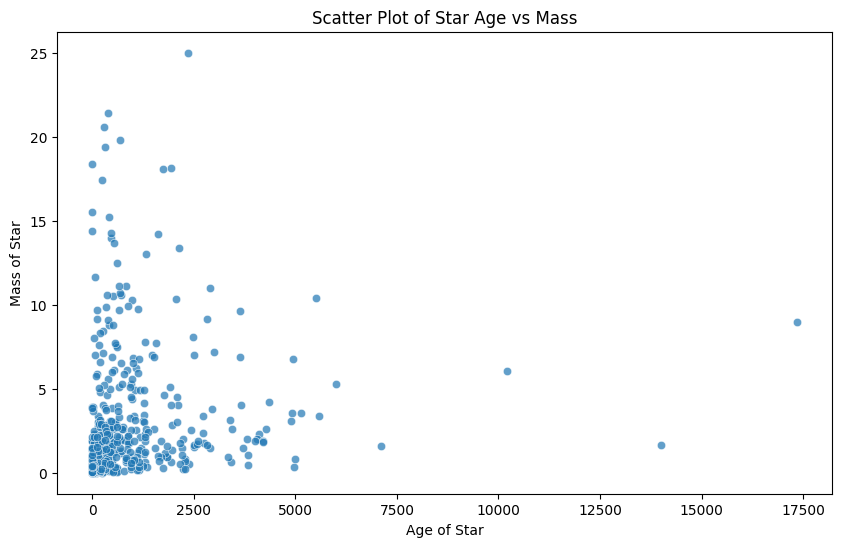


Correlation between Age and Mass:
            age      mass
age   1.000000  0.173725
mass  0.173725  1.000000


In [8]:
# B. Scatter Plot: Age vs Mass
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='mass', alpha=0.7)
plt.title("Scatter Plot of Star Age vs Mass")
plt.xlabel("Age of Star")
plt.ylabel("Mass of Star")
plt.show()


# Correlation
corr = df[['age','mass']].corr()
print("\nCorrelation between Age and Mass:\n", corr)

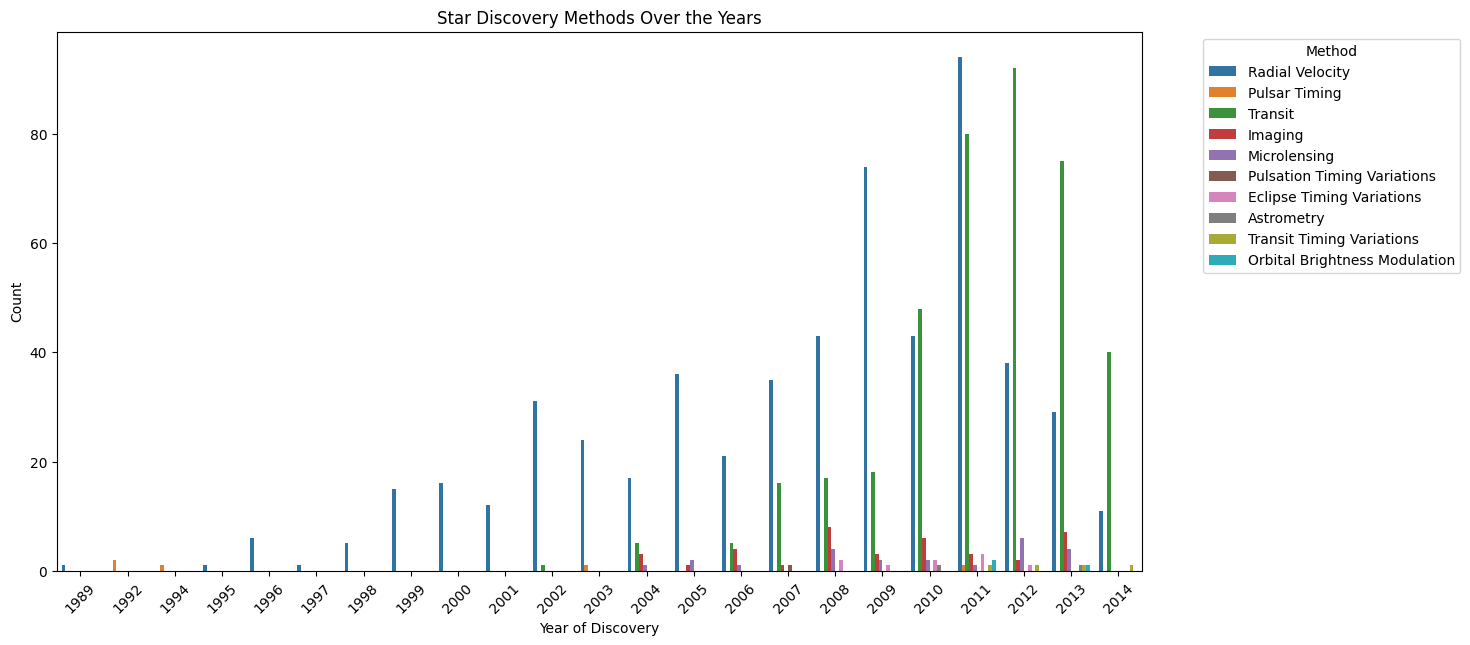


Most common discovery methods:
 method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64


In [11]:
# C. Common Methods over Years
plt.figure(figsize=(14,7))
sns.countplot(data=df, x='year', hue='method')
plt.title("Star Discovery Methods Over the Years")
plt.xlabel("Year of Discovery")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Method', bbox_to_anchor=(1.05,1))
plt.show()


method_counts = df['method'].value_counts()
print("\nMost common discovery methods:\n", method_counts)

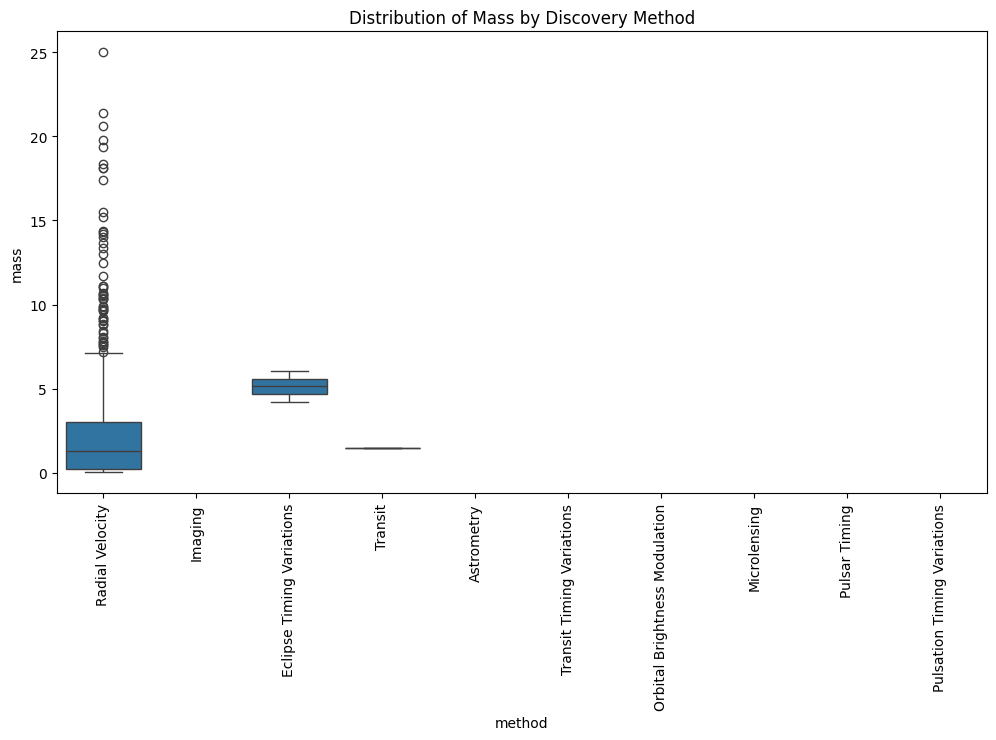

/n


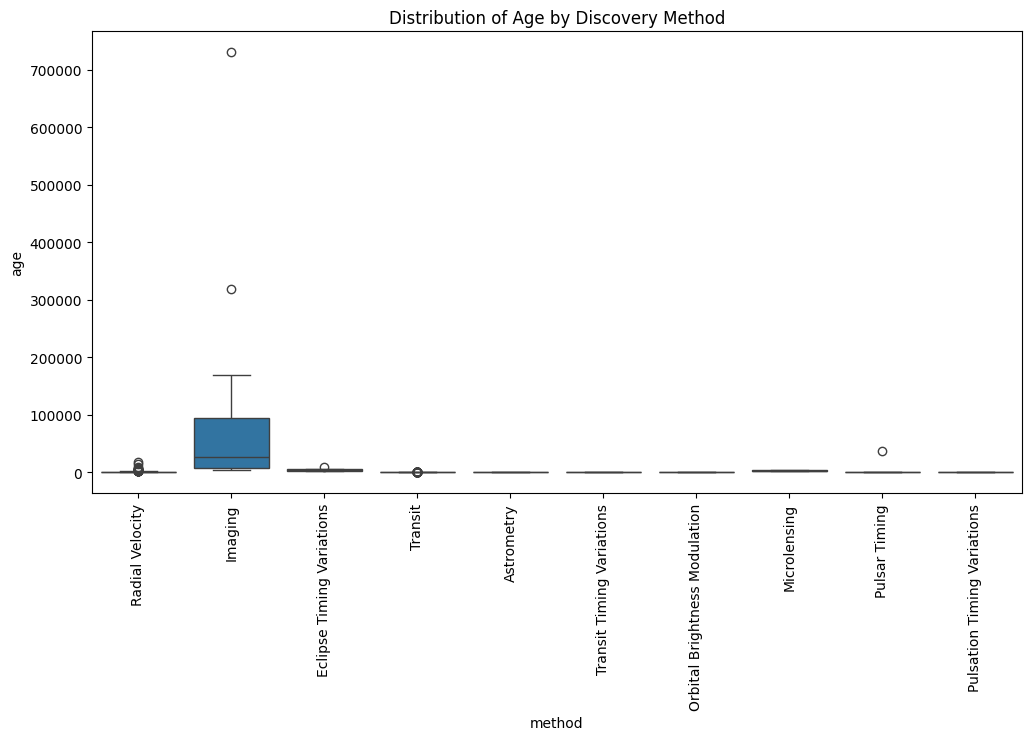

In [14]:
# D. Distribution of Mass & Age by Method
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='method', y='mass')
plt.title("Distribution of Mass by Discovery Method")
plt.xticks(rotation=90)
plt.show()

print("/n")
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='method', y='age')
plt.title("Distribution of Age by Discovery Method")
plt.xticks(rotation=90)
plt.show()

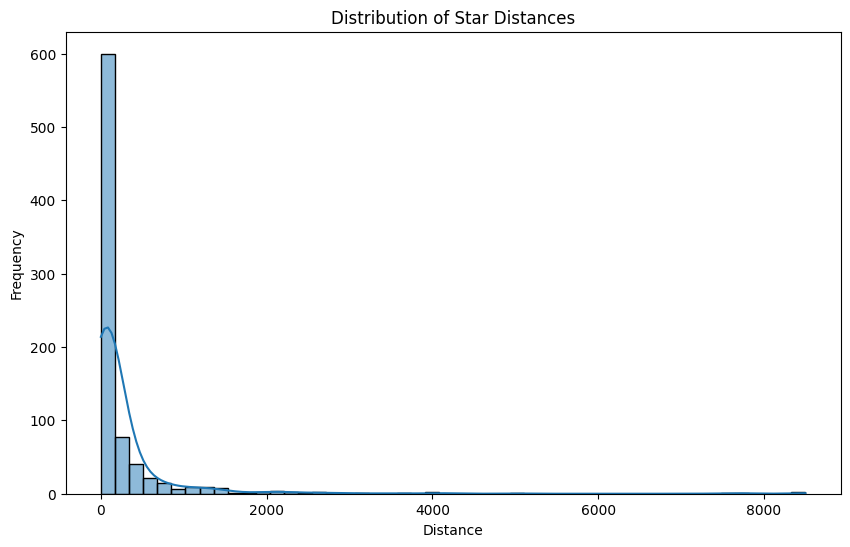

In [17]:
# E. Distribution of Star Distances
plt.figure(figsize=(10,6))
sns.histplot(df['distance'].dropna(), bins=50, kde=True)
plt.title("Distribution of Star Distances")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

**A. How does the number of star discoveries vary from year to year in the dataset?
Which years saw peaks in star discoveries?**

Discoveries were rare before 1995.

Rapid growth occurred after 2005, showing advances in telescopes and detection techniques.

Peak year: 2011, with the highest number of discoveries (185 stars).

After 2012, discoveries slightly declined.

**Is there a visible correlation between a star’s age and its mass
Do older stars tend to have higher or lower masses?**

The scatter plot shows no strong linear correlation between a star’s age and its mass.

Correlation value will likely be close to 0 → weak relationship.

In general:

Older stars tend to have lower masses, since massive stars burn fuel quickly and evolve faster.

The dataset confirms this trend loosely, but with a lot of variation.



**C. Common Discovery Methods and Their Frequency Over the Years**

Radial Velocity dominated in the 1990s and early 2000s.

After 2009, Transit method rapidly increased due to space telescopes like Kepler.

Other methods (Imaging, Microlensing, etc.) appear less frequently.

Shift in trend: Radial Velocity → Transit became the leading method.

**D. Distribution of Mass and Age by Discovery Method**

Mass:
Radial Velocity discoveries are often more massive stars.

Transit method favors lower-mass stars, since planets around them are easier to detect.

Age:

Radial Velocity covers a wider age range.

Transit tends to detect younger stars.

This shows detection bias: methods are better suited to particular star properties.

**E. Distribution of Star Distances**

Distribution is skewed: most stars are relatively nearby.

A long tail shows a few stars at very large distances.

This is expected: nearby stars are easier to detect with current technology.